In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,Dense,Activation
import numpy as np
import matplotlib.pyplot as plt

2024-03-06 15:17:39.950836: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 15:17:39.997242: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 15:17:39.997298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 15:17:39.998840: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 15:17:40.005460: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 15:17:40.005988: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
img_size=256
batch_size=32
n_classes=3

In [3]:
import tensorflow as tf

In [4]:
data=tf.keras.preprocessing.image_dataset_from_directory(
        "PlantVillage",
        shuffle=True,
        image_size=(img_size,img_size),
        batch_size=2,
        #class_names='Potato___Early_blight'#, 'Potato___Late_blight', 'Potato___healthy'
        
)

Found 2152 files belonging to 3 classes.


In [8]:
data_class_names=data.class_names

In [9]:
print(len(data_class_names))

3


In [10]:
data_len=len(data)
print(data_len)

1076


# train_test_split: in tf

In [12]:
def train_test_split_tf(data,train_size=0.8,val_size=0.1,test_size=0.1,shuffle=True,shuffle_size=1000):
    data_size=len(data)
    if shuffle:
        data=data.shuffle(shuffle_size,seed=12)
        train_size=int(train_size*data_size)
        val_size=int(val_size*data_size)
        train_data=data.take(train_size)
        val_data=data.skip(train_size).take(val_size)
        test_data=data.skip(train_size).skip(val_size)
        return train_data,val_data,test_data

In [13]:
train_data,val_data,test_data=train_test_split_tf(data)

In [20]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
channels=3
input_size=(batch_size,img_size,img_size,channels)
model=Sequential()
model.add(layers.experimental.preprocessing.Resizing(img_size,img_size))
model.add(layers.experimental.preprocessing.Rescaling(1/256))
model.add(layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model.add(layers.experimental.preprocessing.RandomRotation(0.2))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_size))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))        
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))        
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))        
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))        
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))        
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(n_classes,activation='softmax'))      


In [22]:
model.build(input_shape=input_size)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (32, 256, 256, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (32, 256, 256, 3)         0         
                                                                 
 random_flip_1 (RandomFlip)  (32, 256, 256, 3)         0         
                                                                 
 random_rotation_1 (RandomR  (32, 256, 256, 3)         0         
 otation)                                                        
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                 

In [24]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,epochs=1,batch_size=batch_size,validation_data=val_data)

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [17]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']

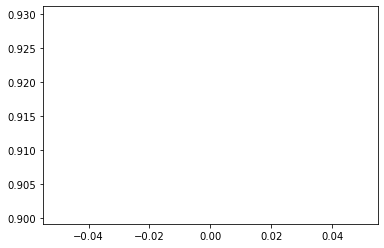

In [18]:
plt.plot(train_loss)
plt.plot(val_loss)

In [19]:
for i in test_data.take(1):
    print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[146., 141., 147.],
         [142., 137., 143.],
         [140., 135., 141.],
         ...,
         [192., 187., 193.],
         [189., 184., 190.],
         [186., 181., 187.]],

        [[159., 154., 160.],
         [158., 153., 159.],
         [160., 155., 161.],
         ...,
         [183., 178., 184.],
         [189., 184., 190.],
         [193., 188., 194.]],

        [[177., 172., 178.],
         [168., 163., 169.],
         [157., 152., 158.],
         ...,
         [182., 177., 183.],
         [181., 176., 182.],
         [179., 174., 180.]],

        ...,

        [[149., 146., 155.],
         [149., 146., 155.],
         [149., 146., 155.],
         ...,
         [177., 174., 185.],
         [179., 176., 187.],
         [179., 176., 187.]],

        [[148., 145., 154.],
         [151., 148., 157.],
         [151., 148., 157.],
         ...,
         [157., 154., 165.],
         [163., 160., 171.],
       

In [19]:
for image,label in test_data.take(3):

    first_image=image[0].numpy().astype('uint8')
    #plt.imshow(first_image)
    print(f"Actual_value: {data_class_names[label[0]]}")
    batch_prediction=model.predict(image)
    print(data_class_names[np.argmax(batch_prediction[0])])
    print(batch_prediction)

Actual_value: Potato___Late_blight
1/1 [==============================] - 1s 816ms/step
Potato___Late_blight
[[0.41751269 0.45229742 0.13018991]
 [0.43791014 0.45658043 0.10550936]
 [0.44721958 0.47202048 0.08075996]
 [0.4340344  0.46655798 0.09940762]
 [0.41532317 0.45666817 0.12800866]
 [0.41344866 0.47215697 0.11439438]
 [0.41024292 0.478378   0.11137909]
 [0.42882976 0.47845227 0.09271795]
 [0.45422965 0.4751332  0.07063711]
 [0.43867242 0.4713095  0.09001809]
 [0.44677797 0.47261527 0.0806068 ]
 [0.43226218 0.46662566 0.10111216]
 [0.43665862 0.4798562  0.08348523]
 [0.40662143 0.47434273 0.11903583]
 [0.42189315 0.4565206  0.12158629]
 [0.41055384 0.47313884 0.11630727]
 [0.40283248 0.46584868 0.1313188 ]
 [0.40781647 0.4774684  0.11471512]
 [0.43008786 0.4688067  0.10110548]
 [0.4523242  0.47298732 0.07468846]
 [0.44980618 0.47049585 0.07969802]
 [0.432278   0.47168547 0.09603651]
 [0.41301277 0.45994195 0.1270453 ]
 [0.43139037 0.46157688 0.1070327 ]
 [0.43782955 0.4638269  0.0

In [21]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    prediction=model.predict(img_array)
    predicted_class=data_class_names[np.argmax(batch_prediction[0])]
    confidence=round(100*(np.max(prediction[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 41ms/step


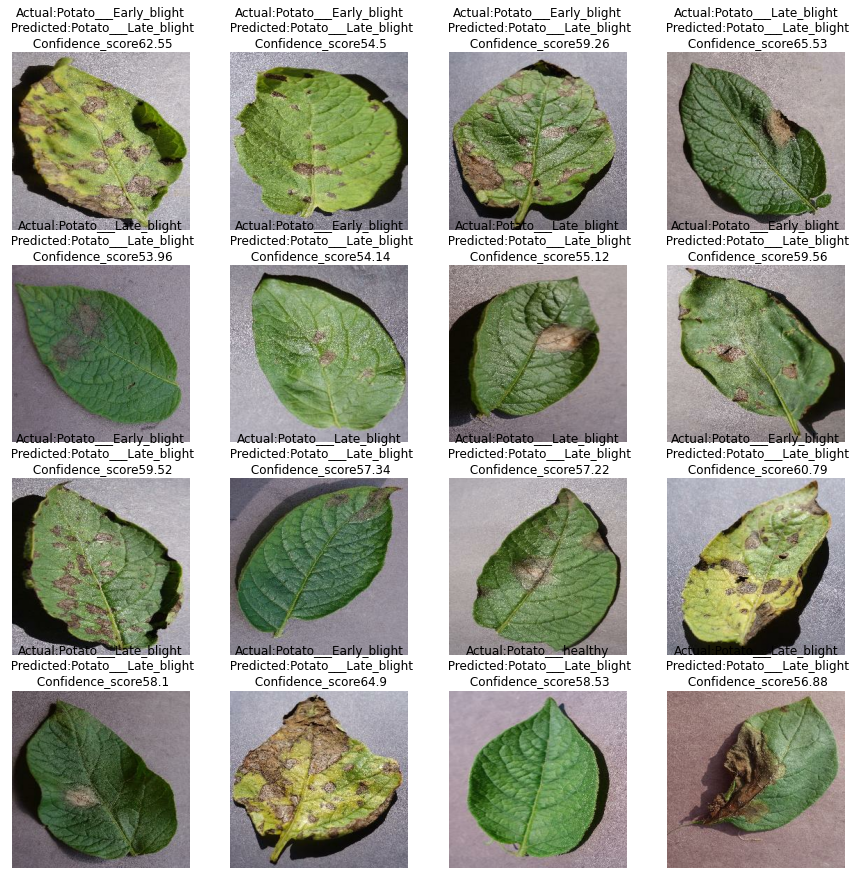

In [22]:
plt.figure(figsize=(15,15))
for image,label in test_data.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,image[i].numpy())
        actual_class=data_class_names[label[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence_score{confidence}")
        plt.axis("off")


In [37]:
import os
model_version=max([int(i) for i in os.listdir("models")+[0]])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets
